In [2]:
import pylab as plt
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.table import Table, join

import seaborn as sns

This notebook uses all the raw data from the CIGALE predictions and photoz catalogue, maps, PSF and relevant MOCs to create XID+ prior object and relevant tiling scheme

## Read in MOCs
The selection functions required are the main MOC associated with the masterlist. 

In [3]:
Sel_func=pymoc.MOC()
Sel_func.read('../../dmu4/dmu4_sm_Herschel-Stripe-82/data/holes_Herschel-Stripe-82_irac_i1_O16_20180423.fits')


## Read in CIGALE predictions catalogue

In [4]:
cigale=Table.read('../../dmu28/dmu28_Herschel-Stripe-82/data/herschel_stripe_82_Ldust_prediction.fits')


In [5]:
cigale['id'].name = 'help_id'

In [5]:
cigale

help_id,bayes.dust.luminosity,bayes.dust.luminosity_err,best.chi_square,best.reduced_chi_square
bytes27,float64,float64,float64,float64
HELP_J000000.145-061343.694,5.991032835191308e+36,2.073375984739078e+36,42.650335725249654,6.092905103607094
HELP_J000000.174-063316.625,1.1922685734022064e+37,1.007034883608234e+37,14.401098904785375,2.057299843540768
HELP_J000000.182-062220.818,1.26929055301189e+36,7.761389069674436e+35,39.79861861350918,5.685516944787025
HELP_J000000.234-062514.991,3.779273091699734e+36,3.942424327027322e+36,22.181170452015497,3.168738636002214
HELP_J000000.339-062430.217,4.212570194347156e+35,3.923272506045582e+35,16.898678074058523,2.414096867722646
HELP_J000000.384-063829.535,3.4107708433206693e+36,3.6234580513671275e+36,10.926686520209497,1.5609552171727852
HELP_J000000.593-070438.548,1.8502502811053166e+37,1.985541509663344e+37,1.3065688564927103,0.1866526937846729
HELP_J000000.687-055314.779,4.870325839303231e+37,4.551981012430787e+37,6.3534669843177545,0.907638140616822
HELP_J000000.715-055222.305,7.437747923659208e+37,7.931593687201441e+37,6.202412842780946,0.8860589775401352


## Read in photoz

In [6]:
photoz=Table.read('../../dmu24/dmu24_Herschel-Stripe-82/data/master_catalogue_herschel-stripe-82_20180307_photoz_20180509.fits')

In [7]:
photoz

help_id,RA,DEC,id,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,za_hb,chi_r_eazy,chi_r_atlas,chi_r_cosmos,chi_r_stellar,stellar_type
bytes27,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6
HELP_J000011.420-053811.645,0.047583188985,-5.636568125,16337,0.2542,0.1352,0.3751,0.8,-99.0,-99.0,-99.0,-99.0,0.291259067401,0.00022997255,0.01326589,0.036343025,5.2573925,rk4iii
HELP_J000007.852-025803.860,0.032715924565,-2.96773899701,16340,0.717,0.3147,1.1295,0.797,-99.0,-99.0,-99.0,-99.0,0.700980058178,-99.0,-99.0,-99.0,-99.0,
HELP_J000010.783-043823.932,0.044930924565,-4.63998099701,16364,0.8444,0.3958,1.3019,0.799,-99.0,-99.0,-99.0,-99.0,0.706082998352,0.224733725,0.17715925,0.5573955,1.35493675,m1v
HELP_J000002.636-054016.363,0.010984924565,-5.67121199701,16365,0.8058,0.4383,1.1942,0.796,-99.0,-99.0,-99.0,-99.0,0.695892381034,0.002343731,0.175668775,0.120380925,2.122863,wk2iii
HELP_J000011.248-004431.596,0.046864924565,-0.742109997014,16366,0.8469,0.3628,1.3437,0.796,-99.0,-99.0,-99.0,-99.0,0.822303383619,-99.0,-99.0,-99.0,-99.0,
HELP_J000007.520+020945.378,0.031334924565,2.16260500299,16367,0.7458,0.3226,1.2008,0.796,-99.0,-99.0,-99.0,-99.0,0.726648307209,0.0209771875,0.03476325,0.042987725,0.08211085,k0v
HELP_J000011.740-065234.280,0.048914924565,-6.87618899701,16368,0.8621,0.3669,1.3719,0.798,-99.0,-99.0,-99.0,-99.0,0.838753365465,-99.0,-99.0,-99.0,-99.0,
HELP_J000003.753-044259.915,0.015636924565,-4.71664299701,16369,0.8138,0.4297,1.2273,0.797,-99.0,-99.0,-99.0,-99.0,0.706082998352,0.123441675,0.114085875,0.3742695,2.1744365,wk3iii
HELP_J000009.306-014619.906,0.038774924565,-1.77219599701,16370,0.8821,0.4254,1.4077,0.798,-99.0,-99.0,-99.0,-99.0,0.700980058178,0.1414335,0.21377695,0.48909675,1.90867425,m0iii


## Join CIGALE and photoz tables

In [7]:
prior=join(cigale,photoz,keys='help_id')

In [8]:
len(prior)

3459384

## Import model/s to find f250_pred

In [9]:
import pickle

# Function used to fit the data (exponential)

def func(p, x):
    p1, p2 = p
    return p1*np.log(x)+p2


# fit to all data - XID+ 
c_model1a = pickle.load(open('../data/Ldust_correction/data_test_depths/cosmos_model_usingChi2.pkl', 'rb'))

## Find Ldust/f250 ratio relationship for each model

In [10]:
# ## NEW MODELS - XID+ ##
#######################

# Read model and apply ratio - z function to the dataset
logLflux_ratioC = func(c_model1a.beta, prior['z1_median'])
# Extract the flux prediction from the ratio (Ldust/f250) relationship
Lflux_ratioC = 10**logLflux_ratioC
f_pred = prior['bayes.dust.luminosity'] / Lflux_ratioC


In [11]:
print('len total prior list: ', len(prior))
print('len C1 cut > 0.2: ', len(prior[f_pred > 0.2]))
print('len C1 cut > 1: ', len(prior[f_pred > 1]))
print('len C1 cut > 2: ', len(prior[f_pred > 2]))
print('len C1 cut > 3: ', len(prior[f_pred > 3]))
print('len C1 cut > 4: ', len(prior[f_pred > 4]))
print('len C1 cut > 5: ', len(prior[f_pred > 5]))
print('len C1 cut > 7: ', len(prior[f_pred > 7]))
print('len C1 cut > 10: ', len(prior[f_pred > 10]))
print('len C1 cut > 20: ', len(prior[f_pred > 20]))
print('len C1 cut > 50: ', len(prior[f_pred > 50]))
print('len C1 cut > 100: ', len(prior[f_pred > 100]))

len total prior list:  3459384
len C1 cut > 0.2:  3452207
len C1 cut > 1:  3440380
len C1 cut > 2:  3369477
len C1 cut > 3:  3271916
len C1 cut > 4:  3175379
len C1 cut > 5:  3087365
len C1 cut > 7:  2935859
len C1 cut > 10:  2747923
len C1 cut > 20:  2243921
len C1 cut > 50:  1324290
len C1 cut > 100:  659018


In [12]:
prior_sel = prior[['help_id', 'RA', 'DEC']]

In [13]:
prior_sel['f250_pred'] = f_pred

In [20]:
prior_sel.write('./data/prior_fpred.fits', format='csv')

In [14]:
prior_flux5 = prior_sel[prior_sel['f250_pred'] > 5]
prior_flux10 = prior_sel[prior_sel['f250_pred'] > 10]
prior_flux20 = prior_sel[prior_sel['f250_pred'] > 20]


In [15]:
prior_flux5.write('./data/prior_fpred_f5.csv', format='csv')

In [16]:
prior_flux5

help_id,RA,DEC,f250_pred
bytes27,float64,float64,float64
HELP_J000000.010-064910.922,4.1198736843203295e-05,-6.819700457556638,26.265092460926294
HELP_J000000.013-054502.126,5.339160527689408e-05,-5.7505906518719,209.44689820744892
HELP_J000000.024-061806.142,9.94133258531746e-05,-6.301706051906884,59.3631554805296
HELP_J000000.074-062930.669,0.00030713412186005886,-6.491852466468119,110.71186357510689
HELP_J000000.085-002724.577,0.0003541980827977469,-0.4568270336986107,6.53815768082034
HELP_J000000.125-071319.607,0.0005220151825337324,-7.2221130282394155,149.34688247309433
HELP_J000000.130-070023.661,0.0005423859806820877,-7.006572578194231,104.68420554178412
HELP_J000000.134-055950.800,0.0005574665556670507,-5.99744447895593,22.02854153027873
HELP_J000000.137-065834.931,0.0005716498495369486,-6.976369601593522,81.52817390732942


## Read in Maps

In [23]:

pswfits='../../dmu19/dmu19_HS82_ATLAS/data/Stripe82-PSWmap-mosaic_MS-20200221.fits'#SPIRE 250 map
pmwfits='../../dmu19/dmu19_HS82_ATLAS/data/Stripe82-PMWmap-mosaic_MS-20200221.fits'#SPIRE 350 map
plwfits='../../dmu19/dmu19_HS82_ATLAS/data/Stripe82-PLWmap-mosaic_MS-20200221.fits'#SPIRE 500 map

pswfits_n='../../dmu19/dmu19_HS82_ATLAS/data/Stripe82-PSWmap-mosaic_MS-20200221-nebulised.fits'#SPIRE 250 map
pmwfits_n='../../dmu19/dmu19_HS82_ATLAS/data/Stripe82-PMWmap-mosaic_MS-20200221-nebulised.fits'#SPIRE 350 map
plwfits_n='../../dmu19/dmu19_HS82_ATLAS/data/Stripe82-PLWmap-mosaic_MS-20200221-nebulised.fits'#SPIRE 500 map

#output folder
output_folder='./'

In [24]:
from astropy.io import fits
from astropy import wcs

#-----250-------------
hdulist =fits.open(pswfits)
neb_hdulist = fits.open(pswfits_n)
im250phdu=hdulist[0].header
im250hdu=neb_hdulist[0].header
im250=neb_hdulist[0].data*1.0E3 #convert to mJy
nim250 = hdulist['ERROR'].data*1.0E3 #convert to mJy
w_250 = wcs.WCS(neb_hdulist[0].header)
pixsize250=3600.0*w_250.wcs.cdelt[1] #pixel size (in arcseconds)
hdulist.close()
neb_hdulist.close()


#-----350-------------
hdulist =fits.open(pmwfits)
neb_hdulist = fits.open(pmwfits_n)
im350phdu=hdulist[0].header
im350hdu=neb_hdulist[0].header
im350=neb_hdulist[0].data*1.0E3 #convert to mJy
nim350 = hdulist['ERROR'].data*1.0E3 #convert to mJy
w_350 = wcs.WCS(neb_hdulist[0].header)
pixsize350=3600.0*w_350.wcs.cdelt[1] #pixel size (in arcseconds)
hdulist.close()
neb_hdulist.close()


#-----500------------
hdulist =fits.open(plwfits)
neb_hdulist = fits.open(plwfits_n)
im500phdu=hdulist[0].header
im500hdu=neb_hdulist[0].header
im500=neb_hdulist[0].data*1.0E3 #convert to mJy
nim500 = hdulist['ERROR'].data*1.0E3 #convert to mJy
w_500 = wcs.WCS(neb_hdulist[0].header)
pixsize500=3600.0*w_500.wcs.cdelt[1] #pixel size (in arcseconds)
hdulist.close()
neb_hdulist.close()


MemoryError: Unable to allocate 1.49 GiB for an array with shape (8671, 23033) and data type float64

In [26]:
pixsize250

6.000000000000001

In [6]:
# obtain wcs info of each image
wcs_temp250 = wcs.WCS(im250hdu)
wcs_temp350 = wcs.WCS(im350hdu)
wcs_temp500 = wcs.WCS(im500hdu)

wcs_list = [wcs_temp250, wcs_temp350, wcs_temp500]
im = ['250', '350','500']
pix_size = [pixsize250, pixsize350, pixsize500]
naxis_list = []
   
for index, wcs_ in enumerate(wcs_list):
    naxis = wcs_._naxis
    naxis_list.append(naxis)

coord = {'250':naxis_list[0], '350':naxis_list[1], '500':naxis_list[2]}
for key, val in coord.items():
    print(key, val)

250 [30706, 11550]
350 [23033, 8671]
500 [15355, 5781]


## Cutout maps

In [7]:
def open_image_save_cutout(file, file_n, position, size, cutout_filename):

    # Load the image and the WCS
    
    hdu = fits.open(file, mode='denywrite')
    neb_hdu = fits.open(file_n, mode='denywrite')
    wcs_ = wcs.WCS(hdu[1].header)
    # Make the cutout, including the WCS
    cutout_im  = Cutout2D(neb_hdu[0].data, position=position, size=size, wcs=wcs_)
    cutout_err = Cutout2D(hdu['ERROR'].data, position=position, size=size, wcs=wcs_)
    cutout_cov = Cutout2D(hdu['COVERAGE'].data, position=position, size=size, wcs=wcs_)

    # Put the cutout image in the FITS HDU
    hdu['IMAGE'].data = cutout_im.data
    hdu['ERROR'].data = cutout_err.data
    hdu['COVERAGE'].data = cutout_cov.data

    # Update the FITS header with the cutout WCS
    hdu['IMAGE'].header.update(cutout_im.wcs.to_header())
    hdu['ERROR'].header.update(cutout_err.wcs.to_header())
    hdu['COVERAGE'].header.update(cutout_cov.wcs.to_header())

    # Write the cutout to a new FITS file
    hdu.writeto(cutout_filename, overwrite=True)
    
    

In [8]:
# Define centers of cutout
centers1 = []
centers2 = []
centers3 = []
centers4 = []
sizes = []
for key, val in coord.items():
    print(key, val)
    # centers (x,y)
    c1 = (val[0]/8, val[1]/2)
    c2 = (val[0]*3/8, val[1]/2)
    c3 = (val[0]*5/8, val[1]/2)
    c4 = (val[0]*7/8, val[1]/2)
    # sizes (y,x)
    s1 = (val[1],val[0]/4)
    
    # append to list
    centers1.append(c1)
    centers2.append(c2)
    centers3.append(c3)
    centers4.append(c4)
    sizes.append(s1)
 



250 [30706, 11550]
350 [23033, 8671]
500 [15355, 5781]


In [10]:
# Save cutouts
centers = [centers1, centers2, centers3, centers4]
for index, center in enumerate(centers): 
    open_image_save_cutout(pswfits, pswfits_n, center[0], sizes[0], './data/HS82_PSW_cutout'+str(index+1)+'.fits' )
    open_image_save_cutout(pmwfits, pmwfits_n, center[1], sizes[1], './data/HS82_PMW_cutout'+str(index+1)+'.fits' )
    open_image_save_cutout(plwfits, plwfits_n, center[2], sizes[2], './data/HS82_PLW_cutout'+str(index+1)+'.fits' )
    print('cutout ', index+1, ' done.')

cutout  1  done.
cutout  2  done.
cutout  3  done.
cutout  4  done.


## Use cutout maps

In [3]:
# Maps
pswfits='./data/HS82_PSW_cutout1.fits'#SPIRE 250 map
pmwfits='./data/HS82_PMW_cutout1.fits'#SPIRE 350 map
plwfits='./data/HS82_PLW_cutout1.fits'#SPIRE 500 map

#output folder
output_folder='./'

In [5]:
from astropy.io import fits
from astropy import wcs
#-----250-------------
hdulist = fits.open(pswfits)
im250phdu=hdulist[0].header
im250hdu=hdulist['IMAGE'].header

im250=hdulist['IMAGE'].data*1.0E3 #convert to mJy
nim250=hdulist['ERROR'].data*1.0E3 #convert to mJy
w_250 = wcs.WCS(hdulist['IMAGE'].header)
pixsize250=3600.0*w_250.wcs.cdelt[1]#[1,1] #pixel size (in arcseconds)
hdulist.close()
#-----350-------------
hdulist = fits.open(pmwfits)
im350phdu=hdulist[0].header
im350hdu=hdulist['IMAGE'].header

im350=hdulist['IMAGE'].data*1.0E3 #convert to mJy
nim350=hdulist['ERROR'].data*1.0E3 #convert to mJy
w_350 = wcs.WCS(hdulist['IMAGE'].header)
pixsize350=3600.0*w_350.wcs.cdelt[1]#[1,1] #pixel size (in arcseconds)
hdulist.close()
#-----500-------------
hdulist = fits.open(plwfits)
im500phdu=hdulist[0].header
im500hdu=hdulist['IMAGE'].header

im500=hdulist['IMAGE'].data*1.0E3 #convert to mJy
nim500=hdulist['ERROR'].data*1.0E3 #convert to mJy
w_500 = wcs.WCS(hdulist['IMAGE'].header)
pixsize500=3600.0*w_500.wcs.cdelt[1]#[1,1] #pixel size (in arcseconds)
hdulist.close()

In [6]:
pixsize250

6.00000000000012

## Set XID+ prior class

This has been run on Apollo, applied iteratively to each cutout

In [ ]:
#---prior250--------
prior250=xidplus.prior(im250,nim250,im250phdu,im250hdu, moc=Sel_func)#Initialise with map, uncertianty map, wcs info and primary header
prior250.prior_cat(prior_flux20['RA'] ,prior_flux20['DEC'] ,'herschel_stripe_82_Ldust_prediction.fits',ID=prior_flux20['help_id'] )#Set input catalogue
prior250.prior_bkg(-5.0,5)#Set prior on background (assumes Gaussian pdf with mu and sigma)
#---prior350--------
prior350=xidplus.prior(im350,nim350,im350phdu,im350hdu, moc=Sel_func)
prior350.prior_cat(prior_flux20['RA'] ,prior_flux20['DEC'] ,'herschel_stripe_82_Ldust_prediction.fits',ID=prior_flux20['help_id'] )
prior350.prior_bkg(-5.0,5)

#---prior500--------
prior500=xidplus.prior(im500,nim500,im500phdu,im500hdu, moc=Sel_func)
prior500.prior_cat(prior_flux20['RA'] ,prior_flux20['DEC'] ,'herschel_stripe_82_Ldust_prediction.fits',ID=prior_flux20['help_id'] )
prior500.prior_bkg(-5.0,5)

In [17]:
#pixsize array (size of pixels in arcseconds)
pixsize=np.array([pixsize250,pixsize350,pixsize500])
#point response function for the three bands
prfsize=np.array([18.15,25.15,36.3])
#use Gaussian2DKernel to create prf (requires stddev rather than fwhm hence pfwhm/2.355)
from astropy.convolution import Gaussian2DKernel

##---------fit using Gaussian beam-----------------------
prf250=Gaussian2DKernel(prfsize[0]/2.355,x_size=101,y_size=101)
prf250.normalize(mode='peak')
prf350=Gaussian2DKernel(prfsize[1]/2.355,x_size=101,y_size=101)
prf350.normalize(mode='peak')
prf500=Gaussian2DKernel(prfsize[2]/2.355,x_size=101,y_size=101)
prf500.normalize(mode='peak')

pind250=np.arange(0,101,1)*1.0/pixsize[0] #get 250 scale in terms of pixel scale of map
pind350=np.arange(0,101,1)*1.0/pixsize[1] #get 350 scale in terms of pixel scale of map
pind500=np.arange(0,101,1)*1.0/pixsize[2] #get 500 scale in terms of pixel scale of map

prior250.set_prf(prf250.array,pind250,pind250)#requires psf as 2d grid, and x and y bins for grid (in pixel scale)
prior350.set_prf(prf350.array,pind350,pind350)
prior500.set_prf(prf500.array,pind500,pind500)

In [2]:
import numpy as np
pixsize=np.array([6.0,8.0,12.0])
#point response function for the three bands
prfsize=np.array([18.15,25.15,36.3])
#use Gaussian2DKernel to create prf (requires stddev rather than fwhm hence pfwhm/2.355)
from astropy.convolution import Gaussian2DKernel

##---------fit using Gaussian beam-----------------------
prf250=Gaussian2DKernel(prfsize[0]/2.355,x_size=101,y_size=101)
prf250.normalize(mode='peak')
prf350=Gaussian2DKernel(prfsize[1]/2.355,x_size=101,y_size=101)
prf350.normalize(mode='peak')
prf500=Gaussian2DKernel(prfsize[2]/2.355,x_size=101,y_size=101)
prf500.normalize(mode='peak')

pind250=np.arange(0,101,1)*1.0/pixsize[0] #get 250 scale in terms of pixel scale of map
pind350=np.arange(0,101,1)*1.0/pixsize[1] #get 350 scale in terms of pixel scale of map
pind500=np.arange(0,101,1)*1.0/pixsize[2] #get 500 scale in terms of pixel scale of map

prior250.set_prf(prf250.array,pind250,pind250)#requires psf as 2d grid, and x and y bins for grid (in pixel scale)
prior350.set_prf(prf350.array,pind350,pind350)
prior500.set_prf(prf500.array,pind500,pind500)

In [12]:
np.arange(0,101,1)*1.0

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [11]:
pind500

array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
       0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
       0.83333333, 0.91666667, 1.        , 1.08333333, 1.16666667,
       1.25      , 1.33333333, 1.41666667, 1.5       , 1.58333333,
       1.66666667, 1.75      , 1.83333333, 1.91666667, 2.        ,
       2.08333333, 2.16666667, 2.25      , 2.33333333, 2.41666667,
       2.5       , 2.58333333, 2.66666667, 2.75      , 2.83333333,
       2.91666667, 3.        , 3.08333333, 3.16666667, 3.25      ,
       3.33333333, 3.41666667, 3.5       , 3.58333333, 3.66666667,
       3.75      , 3.83333333, 3.91666667, 4.        , 4.08333333,
       4.16666667, 4.25      , 4.33333333, 4.41666667, 4.5       ,
       4.58333333, 4.66666667, 4.75      , 4.83333333, 4.91666667,
       5.        , 5.08333333, 5.16666667, 5.25      , 5.33333333,
       5.41666667, 5.5       , 5.58333333, 5.66666667, 5.75      ,
       5.83333333, 5.91666667, 6.        , 6.08333333, 6.16666

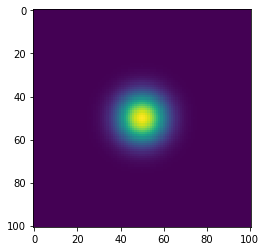

In [5]:
import matplotlib.pyplot as plt
plt.imshow(prf250)

In [27]:
import pickle
#from moc, get healpix pixels at a given order
from xidplus import moc_routines
order=9
tiles=moc_routines.get_HEALPix_pixels(order,prior250.sra,prior250.sdec,unique=True)
order_large=6
tiles_large=moc_routines.get_HEALPix_pixels(order_large,prior250.sra,prior250.sdec,unique=True)
print('----- There are '+str(len(tiles))+' tiles required for input catalogue and '+str(len(tiles_large))+' large tiles')
output_folder='./data/'
outfile=output_folder+'Master_prior.pkl'
xidplus.io.pickle_dump({'priors':[prior250,prior350,prior500],'tiles':tiles,'order':order,'version':xidplus.io.git_version()},outfile)
outfile=output_folder+'Tiles.pkl'
with open(outfile, 'wb') as f:
    pickle.dump({'tiles':tiles,'order':order,'tiles_large':tiles_large,'order_large':order_large,'version':xidplus.io.git_version()},f)
raise SystemExit()